In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

We are comparing the relative $L^2$ error of ensemble w.r.t. coarse grained truth

In [3]:
### Grid 32 data
mesh_32_var_70_particles_30_data = np.load('../../32x32/UQ_l2_error_wrt_truth/l2_error_data/sto_ensemble_v_truth_var_70_grid_32_particles_30_l2_error_t50_to_t70.npz')
mesh_32_var_90_particles_30_data = np.load('../../32x32/UQ_l2_error_wrt_truth/l2_error_data/sto_ensemble_v_truth_var_90_grid_32_particles_30_l2_error_t50_to_t70.npz')


### Grid 64 data
mesh_64_var_70_particles_30_data = np.load('./l2_error_data/sto_ensemble_v_truth_var_70_grid_64_particles_30_l2_error_t50_to_t70.npz')
mesh_64_var_90_particles_30_data = np.load('./l2_error_data/sto_ensemble_v_truth_var_90_grid_64_particles_30_l2_error_t50_to_t70.npz')
mesh_64_var_70_particles_60_data = np.load('./l2_error_data/sto_ensemble_v_truth_var_70_grid_64_particles_60_l2_error_t50_to_t70.npz')
mesh_64_var_90_particles_60_data = np.load('./l2_error_data/sto_ensemble_v_truth_var_90_grid_64_particles_60_l2_error_t50_to_t70.npz')

In [4]:
### Grid 32 data

l2_vel_mesh_32_var_70_particles_30 = mesh_32_var_70_particles_30_data['l2_vel_stoc_v_truth'] 
l2_vel_mesh_32_var_90_particles_30 = mesh_32_var_90_particles_30_data['l2_vel_stoc_v_truth'] 

### Grid 64 data

l2_vel_mesh_64_var_70_particles_30 = mesh_64_var_70_particles_30_data['l2_vel_stoc_v_truth'] 
l2_vel_mesh_64_var_90_particles_30 = mesh_64_var_90_particles_30_data['l2_vel_stoc_v_truth'] 
l2_vel_mesh_64_var_70_particles_60 = mesh_64_var_70_particles_60_data['l2_vel_stoc_v_truth']
l2_vel_mesh_64_var_90_particles_60 = mesh_64_var_90_particles_60_data['l2_vel_stoc_v_truth']


In [5]:
l2_vel_mesh_32_var_70_particles_30.shape, l2_vel_mesh_64_var_70_particles_60.shape

((21, 30), (21, 60))

In [6]:
n_tsteps = np.shape(l2_vel_mesh_32_var_70_particles_30)[0]
time = np.arange(n_tsteps)
print(f'total number of time steps: {n_tsteps}')

total number of time steps: 21


## Mean relative $L^2$ errors 

In [7]:
# Grid 32

l2_vel_mesh_32_var_70_particles_30_mean = np.mean(l2_vel_mesh_32_var_70_particles_30, axis=1)
l2_vel_mesh_32_var_90_particles_30_mean = np.mean(l2_vel_mesh_32_var_90_particles_30, axis=1)

# Grid 64
l2_vel_mesh_64_var_70_particles_30_mean = np.mean(l2_vel_mesh_64_var_70_particles_30, axis=1)
l2_vel_mesh_64_var_90_particles_30_mean = np.mean(l2_vel_mesh_64_var_90_particles_30, axis=1)
l2_vel_mesh_64_var_70_particles_60_mean = np.mean(l2_vel_mesh_64_var_70_particles_60, axis=1)
l2_vel_mesh_64_var_90_particles_60_mean = np.mean(l2_vel_mesh_64_var_90_particles_60, axis=1)

# Uncertainty quantification plots

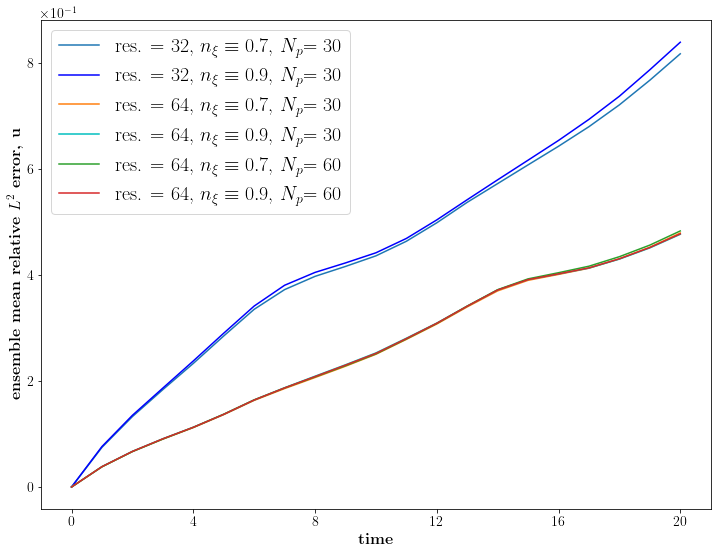

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(time, l2_vel_mesh_32_var_70_particles_30_mean, label=r'res. = $32$, $n_{\xi} \equiv  0.7$, $N_p$= $30$ ')
ax.plot(time, l2_vel_mesh_32_var_90_particles_30_mean, color = 'b', label=r'res. = $32$, $n_{\xi} \equiv  0.9$, $N_p$= $30$ ')

ax.plot(time, l2_vel_mesh_64_var_70_particles_30_mean, label=r'res. = $64$, $n_{\xi} \equiv  0.7$, $N_p$= $30$ ')
ax.plot(time, l2_vel_mesh_64_var_90_particles_30_mean, color = 'c', label=r'res. = $64$, $n_{\xi} \equiv  0.9$, $N_p$= $30$ ')
ax.plot(time, l2_vel_mesh_64_var_70_particles_60_mean, label=r'res. = $64$, $n_{\xi} \equiv  0.7$, $N_p$= $60$ ')
ax.plot(time, l2_vel_mesh_64_var_90_particles_60_mean, label=r'res. = $64$, $n_{\xi} \equiv  0.9$, $N_p$= $60$ ')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {ensemble mean relative} $L^2$ {error,} $\mathbf{u}$')
ax.set_xticks(np.arange(0,21,4))
ax.legend()
# plt.savefig('../plots/uq_stoc_ensem_mean_l2_error_NS.pdf', bbox_inches='tight')

## Stochastic ensemble vs. deterministic 

We compare the one standard deviation about ensemble mean $L^2$ errors and deterministic sol. $L^2$ errors.

In [11]:
### Grid 32 data
mesh_32_var_90_particles_30_data = np.load('../../32x32/UQ_l2_error_wrt_truth/l2_error_data/sto_ensemble_v_truth_var_90_grid_32_particles_30_l2_error_t50_to_t90.npz')
mesh_32_det_adap_data = np.load('../../../deterministic/32x32/global_comparison/l2_error_pattern_cor_data/det_vs_adap_vs_truth_grid_32_t50_to_t90.npz')

### Grid 64 data
mesh_64_var_90_particles_30_data = np.load('./l2_error_data/sto_ensemble_v_truth_var_90_grid_64_particles_30_l2_error_t50_to_t90.npz')
mesh_64_det_adap_data = np.load('../../../deterministic/64x64/global_comparison/l2_error_pattern_cor_data/det_vs_adap_vs_truth_grid_64_t50_to_t90.npz')

Loading the $L^2$ error data !

In [12]:
l2_vel_mesh_32_var_90_particles_30 = mesh_32_var_90_particles_30_data['l2_vel_stoc_v_truth'] 
l2_vel_mesh_32_det = mesh_32_det_adap_data['l2_vel_det_v_truth']

l2_vel_mesh_64_var_90_particles_30 = mesh_64_var_90_particles_30_data['l2_vel_stoc_v_truth'] 
l2_vel_mesh_64_det = mesh_64_det_adap_data['l2_vel_det_v_truth']

In [13]:
l2_vel_mesh_32_var_90_particles_30.shape, l2_vel_mesh_32_det.shape

((41, 30), (41,))

In [14]:
time = np.arange(l2_vel_mesh_32_det.size)

# Mean and one standard deviation regions

Resolution: $32$, Variance: $90 \%$, ensemble size: $30$

In [15]:
l2_vel_mesh_32_var_90_particles_30_mean = np.mean(l2_vel_mesh_32_var_90_particles_30, axis=1)
l2_vel_mesh_32_var_90_particles_30_std = np.std(l2_vel_mesh_32_var_90_particles_30, axis=1)
l2_vel_mesh_32_var_90_particles_30_std_plus = l2_vel_mesh_32_var_90_particles_30_mean + l2_vel_mesh_32_var_90_particles_30_std
l2_vel_mesh_32_var_90_particles_30_std_minus = l2_vel_mesh_32_var_90_particles_30_mean - l2_vel_mesh_32_var_90_particles_30_std

Resolution: $64$, Variance: $90 \%$, ensemble size: $30$

In [16]:
l2_vel_mesh_64_var_90_particles_30_mean = np.mean(l2_vel_mesh_64_var_90_particles_30, axis=1)
l2_vel_mesh_64_var_90_particles_30_std = np.std(l2_vel_mesh_64_var_90_particles_30, axis=1)
l2_vel_mesh_64_var_90_particles_30_std_plus = l2_vel_mesh_64_var_90_particles_30_mean + l2_vel_mesh_64_var_90_particles_30_std
l2_vel_mesh_64_var_90_particles_30_std_minus = l2_vel_mesh_64_var_90_particles_30_mean - l2_vel_mesh_64_var_90_particles_30_std

## Uncertainty quantification plots

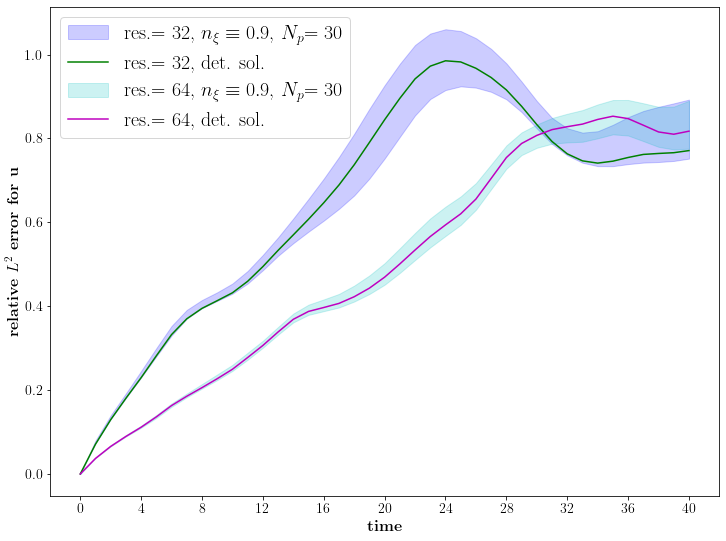

In [21]:
fig, ax = plt.subplots(figsize=(12,9))
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='y' # color list
ax.fill_between(time, l2_vel_mesh_32_var_90_particles_30_std_plus, l2_vel_mesh_32_var_90_particles_30_std_minus, alpha = 0.2, color=c1, label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $30$ ')
ax.plot(time, l2_vel_mesh_32_det, color=c2, label=r'res.= $32$, det. sol.')

ax.fill_between(time, l2_vel_mesh_64_var_90_particles_30_std_plus, l2_vel_mesh_64_var_90_particles_30_std_minus, alpha = 0.2, color=c4, label=r'res.= $64$, $n_{\xi} \equiv  0.9$, $N_p$= $30$ ')
ax.plot(time, l2_vel_mesh_64_det, color=c5, label=r'res.= $64$, det. sol.')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
ax.set_xticks(np.arange(0,41,4))
ax.legend()
plt.savefig('../plots/uq_stoch_ensem_det_adap_l2_error_NS.pdf', bbox_inches='tight')

# Plots for all ensemble members

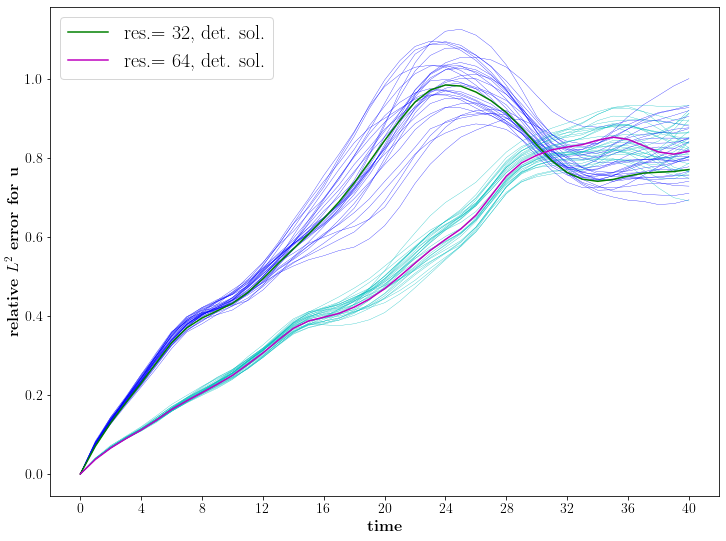

In [18]:
fig, ax = plt.subplots(figsize=(12,9))
c1 = 'b' ; c2 = 'g' ; c3 = 'r' ; c4 = 'c' ; c5 = 'm'; c6 ='y' # color list
n_particles = 30

for j in range(n_particles):
    ax.plot(time, l2_vel_mesh_32_var_90_particles_30[:,j], linewidth=0.3, color=c1) # label=r'res.= $32$, $n_{\xi} \equiv  0.9$, $N_p$= $30$ '
    ax.plot(time,l2_vel_mesh_64_var_90_particles_30[:,j], linewidth=0.3, color=c4) # label=r'res.= $64$, $n_{\xi}\equiv 0.9$, $N_p$= $30$ '

ax.plot(time, l2_vel_mesh_32_det, color=c2, label=r'res.= $32$, det. sol.')

ax.plot(time, l2_vel_mesh_64_det, color=c5, label=r'res.= $64$, det. sol.')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
ax.set_xticks(np.arange(0,41,4))
ax.legend()